In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel('/content/drive/MyDrive/IIT-G/inputdata.xlsx')

In [4]:
data

,defect_density,no_of_defects,index_removed,roff_rv,ron_rv
0,0.023444,1,216,0.000007,8.804207e-09
1,0.023553,2,217,0.005373,3.050072e-08
2,0.023662,3,218,0.000663,3.682850e-08
3,0.023770,4,219,0.000256,5.926848e-06
4,0.023879,5,220,0.000407,2.387368e-05
5,0.023987,6,221,0.000647,1.113548e-04
6,0.024096,7,222,0.000007,8.804207e-09
7,0.024204,8,223,0.005373,3.050072e-08
8,0.024313,9,224,0.000663,3.682850e-08
9,0.024421,10,225,0.000256,5.926848e-06


In [5]:
# data = data.fillna(0) # NAN = 0

In [6]:
# data = data.replace('Au', 1)
# data = data.replace('W', 2)
# data = data.replace('Mo', 3)
# data = data.replace('Sn', 4)
# data = data.replace('Pt', 5)
# data = data.replace('Ti', 6)
# data = data.replace('H-BN', 11)
# data = data.replace('MoS2', 12)
# data = data.replace('MoSe2', 13)
# data = data.replace('PdSe2', 14)

# # Au = 1, W = 2, Mo = 3, Sn = 4, Pt = 5, Ti = 6,
# # H-BN = 11, MoS2 = 12, MoSe2 = 13,PdSe2 = 14

In [7]:
x = data[['defect_density','no_of_defects']]


In [8]:
x

,defect_density,no_of_defects
0,0.023444,1
1,0.023553,2
2,0.023662,3
3,0.023770,4
4,0.023879,5
5,0.023987,6
6,0.024096,7
7,0.024204,8
8,0.024313,9
9,0.024421,10


In [9]:
y = data[['ron_rv','roff_rv']]

In [10]:
y

,ron_rv,roff_rv
0,8.804207e-09,0.000007
1,3.050072e-08,0.005373
2,3.682850e-08,0.000663
3,5.926848e-06,0.000256
4,2.387368e-05,0.000407
5,1.113548e-04,0.000647
6,8.804207e-09,0.000007
7,3.050072e-08,0.005373
8,3.682850e-08,0.000663
9,5.926848e-06,0.000256


In [11]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [12]:
# print(x_train.shape)
# print(y_train.shape)
# print(x_val.shape)
# print(y_val.shape)
# print(x_test.shape)
# print(y_test.shape)

In [13]:
# y_train

In [14]:
# print(type(x_train))
# print(type(y_train))
# print(type(x_val))
# print(type(y_val))
# print(type(x_test))
# print(type(y_test))

In [15]:
# x_train = x_train.to_numpy()
# y_train = y_train.to_numpy()
# x_test = x_test.to_numpy()
# y_test = y_test.to_numpy()
# x_val = x_val.to_numpy()
# y_val = y_val.to_numpy()


In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(2, activation='linear')
])
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                        

In [18]:
# !pip install visualkeras
# import visualkeras
# from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
# from collections import defaultdict
# from PIL import ImageFont

In [19]:
# color_map = defaultdict(dict)
# color_map[Conv2D]['fill'] = 'orange'
# color_map[ZeroPadding2D]['fill'] = 'gray'
# color_map[Dropout]['fill'] = 'pink'
# color_map[MaxPooling2D]['fill'] = 'red'
# color_map[Dense]['fill'] = 'green'
# color_map[Flatten]['fill'] = 'teal'

# visualkeras.layered_view(model, legend=True)

In [20]:
# callbacks = [EarlyStopping(patience=8, monitor='val_loss',mode='min',verbose=1),CSVLogger(filename='east.csv')]
history = model.fit(x,y, epochs=500, batch_size=32)

Epoch 1/500
2/2 [==============================] - 6s 18ms/step - loss: 0.2731 - mean_absolute_error: 0.2731
Epoch 2/500
2/2 [==============================] - 0s 14ms/step - loss: 0.3168 - mean_absolute_error: 0.3168
Epoch 3/500
2/2 [==============================] - 0s 13ms/step - loss: 0.3183 - mean_absolute_error: 0.3183
Epoch 4/500
2/2 [==============================] - 0s 12ms/step - loss: 0.2329 - mean_absolute_error: 0.2329
Epoch 5/500
2/2 [==============================] - 0s 13ms/step - loss: 0.2397 - mean_absolute_error: 0.2397
Epoch 6/500
2/2 [==============================] - 0s 15ms/step - loss: 0.1990 - mean_absolute_error: 0.1990
Epoch 7/500
2/2 [==============================] - 0s 15ms/step - loss: 0.2071 - mean_absolute_error: 0.2071
Epoch 8/500
2/2 [==============================] - 0s 12ms/step - loss: 0.2100 - mean_absolute_error: 0.2100
Epoch 9/500
2/2 [==============================] - 0s 14ms/step - loss: 0.1727 - mean_absolute_error: 0.1727
Epoch 10/500
2/2 [=

KeyError: 'val_loss'

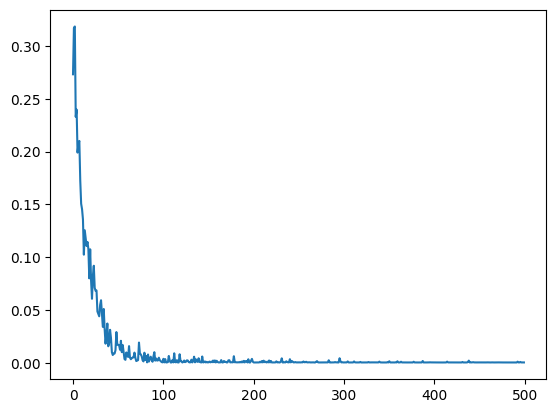

In [21]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MAE vs Epoch')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x, y)

In [ ]:
y_pred = model.predict(x)

In [ ]:
y

In [ ]:
y_pred

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Get predicted values from the model
predicted_values = model.predict(x)

# True labels
true_values = y

# Calculate regression metrics
mse = mean_squared_error(true_values, predicted_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(true_values, predicted_values)
r2 = r2_score(true_values, predicted_values)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

2/2 [==============================] - 0s 7ms/step
Mean Squared Error: 2.1075945565619887e-06
Root Mean Squared Error: 0.0014517556807403884
Mean Absolute Error: 0.0005986520428611572
R-squared: -11.527386914490927


In [ ]:
model.predict([[0.02	,7]])

1/1 [==============================] - 0s 406ms/step


array([[0.00021558, 0.00039796]], dtype=float32)

In [ ]:
#INVERSE DESIGN
!pip install bayesian-optimization pyswarm deap nevergrad

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.9/490.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 15.9 MB/s eta 0:00:00
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=8a9c61c21e68aabf749980a7a1ce1e9e280c04d560ef61414edb73bc1b2dafa9
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
y

,ron_rv,roff_rv
0,8.804207e-09,0.000007
1,3.050072e-08,0.005373
2,3.682850e-08,0.000663
3,5.926848e-06,0.000256
4,2.387368e-05,0.000407
5,1.113548e-04,0.000647
6,8.804207e-09,0.000007
7,3.050072e-08,0.005373
8,3.682850e-08,0.000663
9,5.926848e-06,0.000256


In [ ]:
x

,defect_density,no_of_defects
0,0.023444,1
1,0.023553,2
2,0.023662,3
3,0.023770,4
4,0.023879,5
5,0.023987,6
6,0.024096,7
7,0.024204,8
8,0.024313,9
9,0.024421,10


In [ ]:
# Au = 1, W = 2, Mo = 3, Sn = 4, Pt = 5, Ti = 6,
# H-BN = 11, MoS2 = 12, MoSe2 = 13,PdSe2 = 14

In [ ]:
# from scipy.optimize import minimize
# # Desired target output
# target_output = np.array([0.000256, 5.926848e-06, 0.877, -1.50])

# # Define the loss function for optimization
# def loss_function(x):
#     x = np.array(x).reshape(1, -1)
#     predicted_output = model.predict(x)
#     loss = np.mean(np.abs(predicted_output - target_output))
#     return loss

# # Initial guess for the input parameters (can be random or based on domain knowledge)
# # initial_guess = np.array([14, 3, 1, 6, 1, 0])
# def generate_random_initial_guess(bounds):
#     return [np.random.uniform(low, high) for low, high in bounds]

# # Bounds for the input parameters (if applicable)
# bounds = [(11, 14), (1, 6), (0.053, 100.000), (1, 6), (1, 6), (0, 6)]


# initial_guess = generate_random_initial_guess(bounds)

# # Perform the optimization
# result = minimize(loss_function, initial_guess, bounds=bounds, method='L-BFGS-B')

# # Optimized input parameters
# optimized_input = result.x

# print("Optimized Input Parameters:")
# print(optimized_input)

In [ ]:
import tensorflow as tf
import numpy as np
from scipy.optimize import differential_evolution, shgo, dual_annealing
from sklearn.model_selection import ParameterGrid
from bayes_opt import BayesianOptimization
from pyswarm import pso
import nevergrad as ng
import time

# Target output
target_output = np.array([0.000256, 5.926848e-06, 0.877, -1.50])

# Weighted Loss Function
def loss_function(x):
    x = np.array(x)
    x[0] = int(round(x[0]))
    x[1] = int(round(x[1]))
    x[3] = int(round(x[3]))
    x[4] = int(round(x[4]))
    x[5] = int(round(x[5]))
    x = x.reshape(1, -1)
    predicted_output = model.predict(x, verbose=0)
    loss = np.mean(np.abs(predicted_output - target_output))
    return loss

# Define bounds for different types of variables
bounds = {
    'param1': (11, 14),
    'param2': (1, 6),
    'param3': (0.053, 100.000),
    'param4': (1, 6),
    'param5': (1, 6),
    'param6': (0, 6)
}

# Convert bounds to tuple format for SciPy optimization
tuple_bounds = [(v[0], v[1]) for v in bounds.values()]

# Function to predict output
def predict_output(optimized_input):
    optimized_input = np.array(optimized_input).reshape(1, -1)
    predicted_output = model.predict(optimized_input, verbose=0)
    return predicted_output

# Optimize using different algorithms
def optimize_with_algorithms():
    results = {}

    # Differential Evolution
    start_time = time.time()
    result_de = differential_evolution(loss_function, tuple_bounds, maxiter=50, strategy='best1bin')
    de_params = result_de.x
    de_params[0:1] = np.round(de_params[0:1])
    de_params[3:6] = np.round(de_params[3:6])
    results['Differential Evolution'] = (de_params, predict_output(de_params))
    print(f"Differential Evolution took {time.time() - start_time:.2f} seconds")

    # Particle Swarm Optimization
    start_time = time.time()
    lb = [b[0] for b in tuple_bounds]
    ub = [b[1] for b in tuple_bounds]
    optimized_input_pso, _ = pso(loss_function, lb, ub, swarmsize=10, maxiter=50)
    optimized_input_pso[0:1] = np.round(optimized_input_pso[0:1])
    optimized_input_pso[3:6] = np.round(optimized_input_pso[3:6])
    results['Particle Swarm Optimization'] = (optimized_input_pso, predict_output(optimized_input_pso))
    print(f"Particle Swarm Optimization took {time.time() - start_time:.2f} seconds")

    # Simulated Annealing
    start_time = time.time()
    result_sa = dual_annealing(loss_function, bounds=tuple_bounds, maxiter=50)
    sa_params = result_sa.x
    sa_params[0:1] = np.round(sa_params[0:1])
    sa_params[3:6] = np.round(sa_params[3:6])
    results['Simulated Annealing'] = (sa_params, predict_output(sa_params))
    print(f"Simulated Annealing took {time.time() - start_time:.2f} seconds")

    # Shgo (Simplicial Homology Global Optimization)
    start_time = time.time()
    result_shgo = shgo(loss_function, bounds=tuple_bounds, iters=50)
    shgo_params = result_shgo.x
    shgo_params[0:1] = np.round(shgo_params[0:1])
    shgo_params[3:6] = np.round(shgo_params[3:6])
    results['Shgo'] = (shgo_params, predict_output(shgo_params))
    print(f"Shgo took {time.time() - start_time:.2f} seconds")

    # Grid Search
    start_time = time.time()
    grid = ParameterGrid({
        'param1': range(11, 15),
        'param2': range(1, 7),
        'param3': np.linspace(0.053, 100.000, 3),  # Lower the resolution
        'param4': range(1, 7),
        'param5': range(1, 7),
        'param6': np.linspace(0, 6, 3)  # Lower the resolution
    })
    best_loss = float('inf')
    best_params = None
    for params in grid:
        x = [params[k] for k in sorted(params.keys())]
        loss = loss_function(x)
        if loss < best_loss:
            best_loss = loss
            best_params = x
    results['Grid Search'] = (best_params, predict_output(best_params))
    print(f"Grid Search took {time.time() - start_time:.2f} seconds")

    # Bayesian Optimization
    start_time = time.time()
    def bayesian_function(param1, param2, param3, param4, param5, param6):
        return -loss_function([param1, param2, param3, param4, param5, param6])

    optimizer = BayesianOptimization(
        f=bayesian_function,
        pbounds={
            'param1': bounds['param1'],
            'param2': bounds['param2'],
            'param3': bounds['param3'],
            'param4': bounds['param4'],
            'param5': bounds['param5'],
            'param6': bounds['param6']
        },
        random_state=42,
        allow_duplicate_points=True  # Allow duplicate points
    )
    optimizer.maximize(init_points=5, n_iter=50)  # Reduce the number of iterations
    best_params_bo = optimizer.max['params']
    best_params_bo_array = [best_params_bo[key] for key in sorted(best_params_bo.keys())]
    best_params_bo_array[0:1] = np.round(best_params_bo_array[0:1])
    best_params_bo_array[3:6] = np.round(best_params_bo_array[3:6])
    results['Bayesian Optimization'] = (best_params_bo_array, predict_output(best_params_bo_array))
    print(f"Bayesian Optimization took {time.time() - start_time:.2f} seconds")

    return results

optimized_results = optimize_with_algorithms()

for algo, (params, prediction) in optimized_results.items():
    print(f"\nOptimized Input Parameters ({algo}):")
    print(params)
    print(f"Predicted Output ({algo}):")
    print(prediction)

Differential Evolution took 426.18 seconds
Stopping search: Swarm best objective change less than 1e-08
Particle Swarm Optimization took 24.77 seconds
Simulated Annealing took 53.45 seconds
Shgo took 683.90 seconds
Grid Search took 703.62 seconds
|   iter    |  target   |  param1   |  param2   |  param3   |  param4   |  param5   |  param6   |
-------------------------------------------------------------------------------------------------
| 1         | -0.1473   | 12.12     | 5.754     | 73.21     | 3.993     | 1.78      | 0.936     |
| 2         | -0.1264   | 11.17     | 5.331     | 60.13     | 4.54      | 1.103     | 5.819     |
| 3         | -0.129    | 13.5      | 2.062     | 18.23     | 1.917     | 2.521     | 3.149     |
| 4         | -0.1212   | 12.3      | 2.456     | 61.21     | 1.697     | 2.461     | 2.198     |
| 5         | -0.1315   | 12.37     | 4.926     | 20.01     | 3.571     | 3.962     | 0.2787    |
| 6         | -0.1332   | 13.16     | 1.0       | 54.92     | 1.0  

<Figure size 1200x600 with 0 Axes>

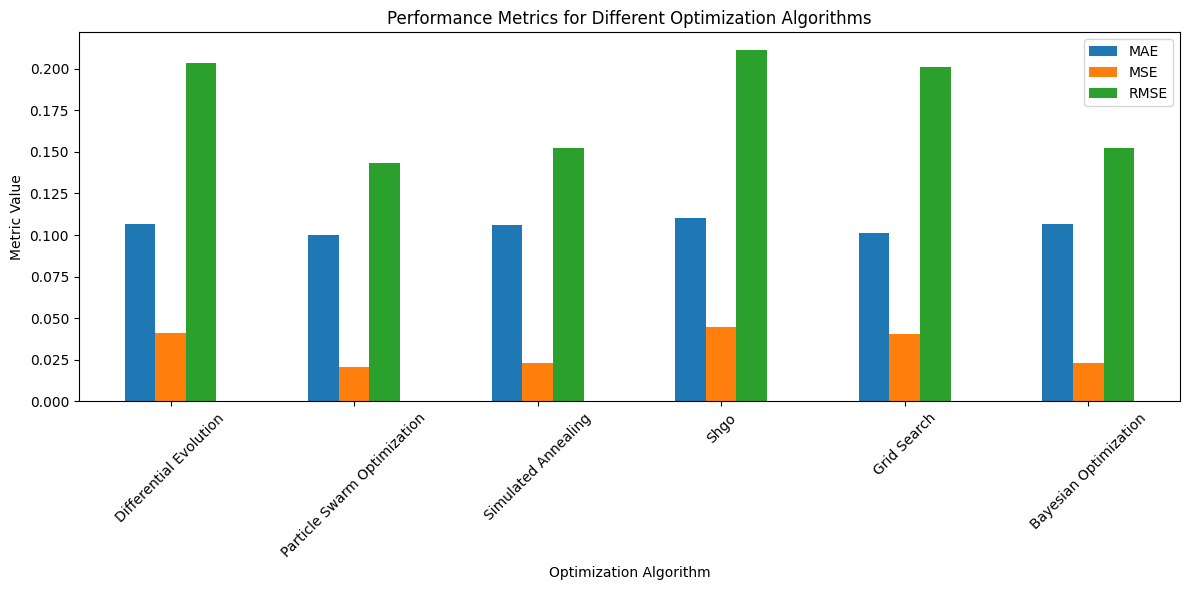

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Function to compute performance metrics
def compute_metrics(predictions, target):
    metrics = {}
    metrics['MAE'] = mean_absolute_error(target, predictions)
    metrics['MSE'] = mean_squared_error(target, predictions)
    metrics['RMSE'] = math.sqrt(metrics['MSE'])
    return metrics

# Compute metrics for all optimization results
metrics_dict = {}
for algo, (params, prediction) in optimized_results.items():
    metrics_dict[algo] = compute_metrics(prediction[0], target_output)

# Convert metrics to a DataFrame for easier plotting
import pandas as pd
metrics_df = pd.DataFrame(metrics_dict).T

# Plot the metrics
plt.figure(figsize=(12, 6))
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Performance Metrics for Different Optimization Algorithms')
plt.xlabel('Optimization Algorithm')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


Performance Metrics (Differential Evolution):
MAE: 0.106658
MSE: 0.041315
RMSE: 0.203260

Performance Metrics (Particle Swarm Optimization):
MAE: 0.099933
MSE: 0.020561
RMSE: 0.143392

Performance Metrics (Simulated Annealing):
MAE: 0.106061
MSE: 0.023226
RMSE: 0.152399

Performance Metrics (Shgo):
MAE: 0.110324
MSE: 0.044614
RMSE: 0.211221

Performance Metrics (Grid Search):
MAE: 0.101092
MSE: 0.040492
RMSE: 0.201227

Performance Metrics (Bayesian Optimization):
MAE: 0.106494
MSE: 0.023240
RMSE: 0.152446


<Figure size 1200x600 with 0 Axes>

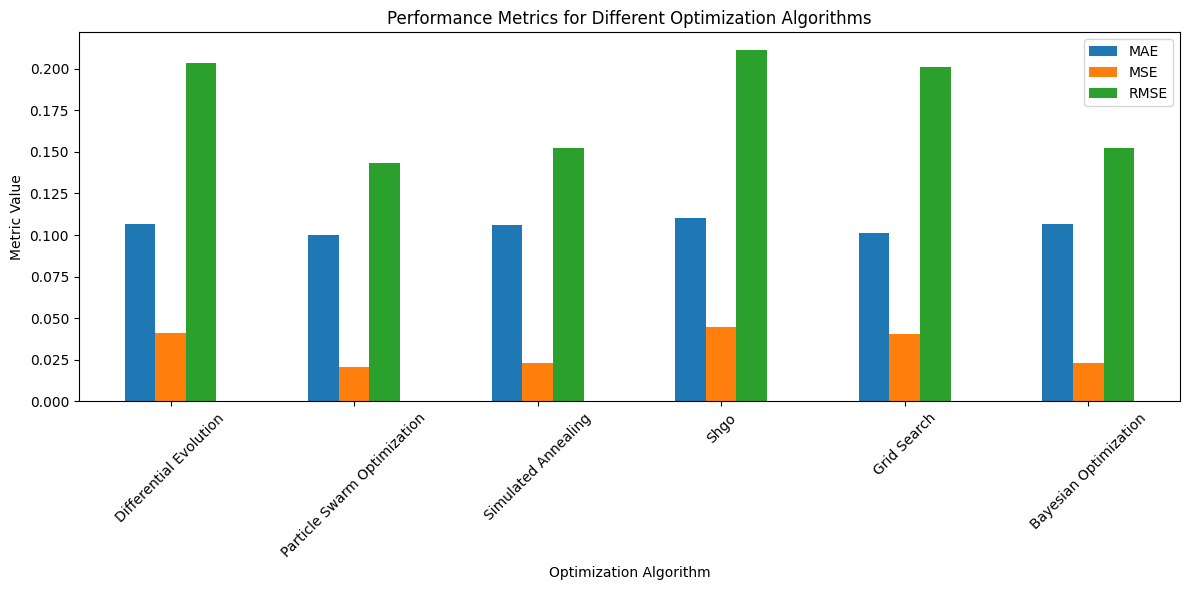

In [ ]:
# Compute and print metrics for all optimization results
for algo, (params, prediction) in optimized_results.items():
    metrics = compute_metrics(prediction[0], target_output)
    print(f"\nPerformance Metrics ({algo}):")
    print(f"MAE: {metrics['MAE']:.6f}")
    print(f"MSE: {metrics['MSE']:.6f}")
    print(f"RMSE: {metrics['RMSE']:.6f}")

# Plot the metrics as bar plots
plt.figure(figsize=(12, 6))
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Performance Metrics for Different Optimization Algorithms')
plt.xlabel('Optimization Algorithm')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models
# import numpy as np

# # Sample data
# x_data = np.array([
#     [6, 0.053, 1, 2, 6],
#     [1, 100.0, 3, 4, 0]
# ])
# y_data = np.array([
#     [7e-6, 8.804207e-9, 2.0, -1.68],
#     [0.005373, 3.050072e-8, 1.75, -1.0]
# ])

# # Define the generator model
# def build_generator(output_dim):
#     model = models.Sequential([
#         layers.Dense(256, activation='relu', input_shape=(100,)),
#         layers.BatchNormalization(),
#         layers.Dense(128, activation='relu'),
#         layers.Dense(output_dim, activation='linear')
#     ])
#     return model

# # Define the discriminator model
# def build_discriminator(input_dim):
#     model = models.Sequential([
#         layers.Dense(256, activation='relu', input_shape=(input_dim,)),
#         layers.BatchNormalization(),
#         layers.Dense(128, activation='relu'),
#         layers.Dense(1, activation='linear')
#     ])
#     return model


# # Compile the GAN
# def build_gan(generator, discriminator):
#     discriminator.compile(optimizer='adam', loss='binary_crossentropy')
#     discriminator.trainable = False
#     gan_input = layers.Input(shape=(100,))
#     generated_input = generator(gan_input)
#     combined_input = layers.Concatenate()([gan_input, generated_input])
#     gan_output = discriminator(combined_input)
#     gan = models.Model(gan_input, gan_output)
#     gan.compile(optimizer='adam', loss='binary_crossentropy')
#     return gan

# # Custom rounding function
# def round_params(generated_params):
#     generated_params[:, :2] = np.round(generated_params[:, :2])
#     generated_params[:, 3:] = np.round(generated_params[:, 3:])
#     return generated_params

# # Build and compile the models
# generator = build_generator(output_dim=x_data.shape[1])
# discriminator_input_dim = x_data.shape[1] + y_data.shape[1]
# discriminator = build_discriminator(input_dim=discriminator_input_dim)

# gan = build_gan(generator, discriminator)

# # Training the GAN
# epochs = 10000
# batch_size = 2

# for epoch in range(epochs):
#     # Train the discriminator
#     idx = np.random.randint(0, x_data.shape[0], batch_size)
#     real_inputs = x_data[idx]
#     real_outputs = y_data[idx]
#     noise = np.random.normal(0, 1, (batch_size, 100))
#     generated_inputs = generator.predict(noise)
#     generated_inputs = round_params(generated_inputs)
#     real_pairs = np.concatenate([real_inputs, real_outputs], axis=1)
#     generated_pairs = np.concatenate([noise, generated_inputs], axis=1)

#     d_loss_real = discriminator.train_on_batch(real_pairs, np.ones((batch_size, 1)))
#     d_loss_fake = discriminator.train_on_batch(generated_pairs, np.zeros((batch_size, 1)))
#     d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

#     # Train the generator
#     noise = np.random.normal(0, 1, (batch_size, 100))
#     g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

#     if epoch % 1000 == 0:
#         print(f"{epoch} [D loss: {d_loss}] [G loss: {g_loss}]")

# # Inverse design: generate input parameters given a desired output
# desired_output = np.array([[0.001, 1e-08, 2.0, -1.5]])  # Example desired output
# noise = np.random.normal(0, 1, (1, 100))
# generated_input = generator.predict(noise)
# generated_input = round_params(generated_input)
# print("Generated input parameters for desired output:", generated_input)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# Generator Model
def build_generator(input_dim, output_dim):
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=input_dim),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(output_dim, activation='linear')
    ])
    return model

# Discriminator Model
def build_discriminator(input_dim):
    model = tf.keras.Sequential([
        layers.Dense(512, activation='leaky_relu', input_dim=input_dim),
        layers.Dense(256, activation='leaky_relu'),
        layers.Dense(1, activation='linear')
    ])
    return model

# Hyperparameters
z_dim = 100  # Dimension of the noise input to the generator
data_dim = 6  # Dimension of the data

# Initialize the models
generator = build_generator(z_dim, data_dim)
discriminator = build_discriminator(data_dim)

# Compile the discriminator
discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss='mse')

# Build and compile the GAN model
discriminator.trainable = False

gan_input = layers.Input(shape=(z_dim,))
generated_data = generator(gan_input)
gan_output = discriminator(generated_data)

gan = tf.keras.models.Model(gan_input, gan_output)
gan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss='mse')


In [ ]:
# Number of epochs
num_epochs = 100
batch_size = 64

# # Example dataset (update this with your actual data)
# x = np.array([
#     [11, 6, 0.053, 1, 2, 6],
#     [12, 1, 100.000, 3, 4, 0],
#     [13, 1, 100.000, 3, 5, 4],
#     [14, 3, 1.000, 6, 1, 0],
#     [14, 5, 1.000, 6, 1, 0],
#     [14, 7, 1.000, 6, 1, 0]
# ])

# Function to generate real data from your dataset
def get_real_data():
    return x

# Training loop
for epoch in range(num_epochs):
    # Train Discriminator
    real_data = get_real_data()
    batch_size_real = real_data.shape[0]

    labels_real = np.ones((batch_size_real, 1))
    labels_fake = np.zeros((batch_size_real, 1))

    d_loss_real = discriminator.train_on_batch(real_data, labels_real)

    z = np.random.normal(0, 1, (batch_size_real, z_dim))
    fake_data = generator.predict(z)

    d_loss_fake = discriminator.train_on_batch(fake_data, labels_fake)

    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    z = np.random.normal(0, 1, (batch_size, z_dim))
    labels_gan = np.ones((batch_size, 1))

    g_loss = gan.train_on_batch(z, labels_gan)

    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], d_loss: {d_loss}, g_loss: {g_loss}')

print("Training completed.")


1/1 [==============================] - 0s 65ms/step
Epoch [0/1000], d_loss: 0.08519823162350804, g_loss: 0.9100799560546875
1/1 [==============================] - 0s 25ms/step
Epoch [100/1000], d_loss: 0.28886501491069794, g_loss: 0.9236549139022827
1/1 [==============================] - 0s 26ms/step
Epoch [200/1000], d_loss: 0.21085740998387337, g_loss: 0.7645223140716553
1/1 [==============================] - 0s 20ms/step
Epoch [300/1000], d_loss: 0.2273121327161789, g_loss: 0.61153244972229
1/1 [==============================] - 0s 139ms/step
Epoch [400/1000], d_loss: 0.2287823185324669, g_loss: 0.6133699417114258
1/1 [==============================] - 0s 24ms/step
Epoch [500/1000], d_loss: 0.2335568144917488, g_loss: 0.5387319326400757
1/1 [==============================] - 0s 33ms/step
Epoch [600/1000], d_loss: 0.23354681581258774, g_loss: 0.5981482863426208
1/1 [==============================] - 0s 31ms/step
Epoch [700/1000], d_loss: 0.22012733295559883, g_loss: 0.519001364707946

In [ ]:
# Define bounds
bounds = {
    'param1': (11, 14),
    'param2': (1, 6),
    'param3': (0.053, 100.000),
    'param4': (1, 6),
    'param5': (1, 6),
    'param6': (0, 6)
}

# Function to post-process the generated samples
def post_process_samples(samples, bounds):
    samples[:, 0] = np.clip(np.round(samples[:, 0]), bounds['param1'][0], bounds['param1'][1])
    samples[:, 1] = np.clip(np.round(samples[:, 1]), bounds['param2'][0], bounds['param2'][1])
    samples[:, 2] = np.clip(samples[:, 2], bounds['param3'][0], bounds['param3'][1])
    samples[:, 3] = np.clip(np.round(samples[:, 3]), bounds['param4'][0], bounds['param4'][1])
    samples[:, 4] = np.clip(np.round(samples[:, 4]), bounds['param5'][0], bounds['param5'][1])
    samples[:, 5] = np.clip(np.round(samples[:, 5]), bounds['param6'][0], bounds['param6'][1])
    return samples

# Generate new samples
# z = np.random.normal(0, 1, (10, z_dim))  # Generate 10 new samples
z = np.array([0.1,0.2,0.3,0.4])
generated_samples = generator.predict(z)

# Post-process the generated samples
processed_samples = post_process_samples(generated_samples, bounds)

print("Generated Samples:")
print(processed_samples)

InvalidArgumentError: Graph execution error:

Detected at node sequential_24/dense_91/MatMul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-45-2e9a592f5a8c>", line 24, in <cell line: 24>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2655, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py", line 241, in call

In[0] ndims must be >= 2: 1
	 [[{{node sequential_24/dense_91/MatMul}}]] [Op:__inference_predict_function_375542]

In [ ]:
# INT
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# Custom activation layer for integer output
class IntegerActivation(layers.Layer):
    def call(self, inputs):
        return tf.round(inputs)

# Generator Model
def build_generator(input_dim, output_dim):
    input_layer = layers.Input(shape=(input_dim,))

    x = layers.Dense(128, activation='relu')(input_layer)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(512, activation='relu')(x)

    param1 = layers.Dense(1, activation='linear')(x)
    param2 = layers.Dense(1, activation='linear')(x)
    param3 = layers.Dense(1, activation='linear')(x)  # Float value, no activation change
    param4 = layers.Dense(1, activation='linear')(x)
    param5 = layers.Dense(1, activation='linear')(x)
    param6 = layers.Dense(1, activation='linear')(x)

    param1 = IntegerActivation()(param1)
    param2 = IntegerActivation()(param2)
    param4 = IntegerActivation()(param4)
    param5 = IntegerActivation()(param5)
    param6 = IntegerActivation()(param6)

    output_layer = layers.Concatenate()([param1, param2, param3, param4, param5, param6])

    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
    return model

# Discriminator Model
def build_discriminator(input_dim):
    model = tf.keras.Sequential([
        layers.Dense(512, activation='leaky_relu', input_dim=input_dim),
        layers.Dense(256, activation='leaky_relu'),
        layers.Dense(1, activation='linear')
    ])
    return model

# Hyperparameters
z_dim = 100  # Dimension of the noise input to the generator
data_dim = 6  # Dimension of the data

# Initialize the models
generator = build_generator(z_dim, data_dim)
discriminator = build_discriminator(data_dim)

# Compile the discriminator
discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss='mse')

# Build and compile the GAN model
discriminator.trainable = False

gan_input = layers.Input(shape=(z_dim,))
generated_data = generator(gan_input)
gan_output = discriminator(generated_data)

gan = tf.keras.models.Model(gan_input, gan_output)
gan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss='mse')


In [ ]:
# Number of epochs
num_epochs = 100
batch_size = 64


# Normalize the float column (param3) for better performance
x[:, 2] = (x[:, 2] - 0.053) / (100.000 - 0.053)

# Function to generate real data from your dataset
def get_real_data():
    return x

# Training loop
for epoch in range(num_epochs):
    # Train Discriminator
    real_data = get_real_data()
    batch_size_real = real_data.shape[0]

    labels_real = np.ones((batch_size_real, 1))
    labels_fake = np.zeros((batch_size_real, 1))

    d_loss_real = discriminator.train_on_batch(real_data, labels_real)

    z = np.random.normal(0, 1, (batch_size_real, z_dim))
    fake_data = generator.predict(z)

    d_loss_fake = discriminator.train_on_batch(fake_data, labels_fake)

    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    z = np.random.normal(0, 1, (batch_size, z_dim))
    labels_gan = np.ones((batch_size, 1))

    g_loss = gan.train_on_batch(z, labels_gan)

    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], d_loss: {d_loss}, g_loss: {g_loss}')

print("Training completed.")


1/1 [==============================] - 0s 211ms/step


Epoch [0/100], d_loss: 0.1506273306440562, g_loss: 0.9611825942993164
1/1 [==============================] - 0s 20ms/step
Training completed.


In [ ]:
# Define bounds
bounds = {
    'param1': (11, 14),
    'param2': (1, 6),
    'param3': (0.053, 100.000),
    'param4': (1, 6),
    'param5': (1, 6),
    'param6': (0, 6)
}

# Function to post-process the generated samples
def post_process_samples(samples, bounds):
    samples[:, 0] = np.clip(samples[:, 0], bounds['param1'][0], bounds['param1'][1])
    samples[:, 1] = np.clip(samples[:, 1], bounds['param2'][0], bounds['param2'][1])
    samples[:, 2] = samples[:, 2] * (bounds['param3'][1] - bounds['param3'][0]) + bounds['param3'][0]  # Denormalize
    samples[:, 3] = np.clip(samples[:, 3], bounds['param4'][0], bounds['param4'][1])
    samples[:, 4] = np.clip(samples[:, 4], bounds['param5'][0], bounds['param5'][1])
    samples[:, 5] = np.clip(samples[:, 5], bounds['param6'][0], bounds['param6'][1])
    return samples

# Generate new samples
z = np.random.normal(0, 1, (10, z_dim))  # Generate 10 new samples
generated_samples = generator.predict(z)

# Post-process the generated samples
processed_samples = post_process_samples(generated_samples, bounds)

print("Generated Samples:")
print(processed_samples)


1/1 [==============================] - 0s 22ms/step
Generated Samples:
[[11.        1.       42.28343   1.        1.        0.      ]
 [11.        1.       20.684832  1.        1.        0.      ]
 [11.        1.       26.448273  1.        1.        0.      ]
 [11.        1.       18.103437  1.        1.        0.      ]
 [11.        1.       50.125523  1.        1.        0.      ]
 [11.        1.       46.149002  1.        1.        0.      ]
 [11.        1.       17.235891  1.        1.        0.      ]
 [11.        1.       24.77718   1.        1.        0.      ]
 [11.        1.       36.967644  1.        1.        0.      ]
 [11.        1.       70.83195   1.        1.        0.      ]]


In [ ]:
x

,mname,mthickness (nm),cellarea (µm2),topelectrode,bottomelectrode,extrastack
0,11,6,0.053,1,2,6
1,12,1,100.000,3,4,0
2,13,1,100.000,3,5,4
3,14,3,1.000,6,1,0
4,14,5,1.000,6,1,0
5,14,7,1.000,6,1,0


In [ ]:
y

,roff_rv,ron_rv,vs,vr
0,0.000007,8.804207e-09,2.000,-1.68
1,0.005373,3.050072e-08,1.750,-1.00
2,0.000663,3.682850e-08,0.750,-0.75
3,0.000256,5.926848e-06,0.877,-1.50
4,0.000407,2.387368e-05,0.580,-1.50
5,0.000647,1.113548e-04,0.660,-1.50


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# Generator Model
def build_generator(input_dim, output_dim):
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=input_dim),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(output_dim, activation='linear')
    ])
    return model

# Discriminator Model
def build_discriminator(input_dim):
    model = tf.keras.Sequential([
        layers.Dense(512, activation='leaky_relu', input_dim=input_dim),
        layers.Dense(256, activation='leaky_relu'),
        layers.Dense(1, activation='linear')
    ])
    return model

# Hyperparameters
z_dim = 100  # Dimension of the noise input to the generator
input_dim = 4  # Dimension of input parameters
output_dim = 6  # Dimension of output parameters

# Initialize the models
generator = build_generator(z_dim, output_dim)  # Note: input_dim is z_dim for the generator
discriminator = build_discriminator(output_dim)

# Compile the discriminator
discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss='mse')

# Build and compile the GAN model
discriminator.trainable = False

# Define bounds for post-processing
bounds = {
    'param1': (11, 14),
    'param2': (1, 6),
    'param3': (0.053, 100.000),
    'param4': (1, 6),
    'param5': (1, 6),
    'param6': (0, 6)
}

# Function to post-process the generated samples
def post_process_samples(samples, bounds):
    samples[:, 0] = np.clip(np.round(samples[:, 0]), bounds['param1'][0], bounds['param1'][1])
    samples[:, 1] = np.clip(np.round(samples[:, 1]), bounds['param2'][0], bounds['param2'][1])
    samples[:, 2] = np.clip(samples[:, 2], bounds['param3'][0], bounds['param3'][1])
    samples[:, 3] = np.clip(np.round(samples[:, 3]), bounds['param4'][0], bounds['param4'][1])
    samples[:, 4] = np.clip(np.round(samples[:, 4]), bounds['param5'][0], bounds['param5'][1])
    samples[:, 5] = np.clip(np.round(samples[:, 5]), bounds['param6'][0], bounds['param6'][1])
    return samples

# Inverse design function
def inverse_design(generator, target_output, z_dim, learning_rate=0.001, steps=1000):
    # Initialize a latent vector
    z = tf.Variable(np.random.normal(0, 1, (1, z_dim)), dtype=tf.float32)

    # Define the optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate)

    # Define the loss function
    def loss_fn():
        generated_output = generator(z)
        return tf.reduce_mean(tf.square(generated_output - target_output))

    # Optimization loop
    for step in range(steps):
        optimizer.minimize(loss_fn, var_list=[z])
        if step % 100 == 0:
            loss_value = loss_fn().numpy()
            print(f'Step {step}, Loss: {loss_value}')

    # Get the optimized latent vector and generated output
    optimized_z = z.numpy()
    generated_output = generator(optimized_z).numpy()
    return optimized_z, generated_output

# Example target output (adjust as needed)
target_output = np.array([[ 11, 6, 0.053, 1, 2, 6]])

# Perform inverse design
optimized_z, generated_output = inverse_design(generator, target_output, z_dim)

# Post-process the generated output
processed_output = post_process_samples(generated_output, bounds)

print("Target Output:")
print(target_output)
print("Generated Output:")
print(processed_output)

# Save the GAN model
generator.save('saved_models/generator_model.h5')
discriminator.save('saved_models/discriminator_model.h5')

print("GAN models saved.")

Step 0, Loss: 32.25944900512695
Step 100, Loss: 31.35838508605957
Step 200, Loss: 30.6011905670166
Step 300, Loss: 29.995622634887695
Step 400, Loss: 29.460176467895508
Step 500, Loss: 28.987661361694336
Step 600, Loss: 28.55036735534668
Step 700, Loss: 28.144819259643555
Step 800, Loss: 27.70709228515625
Step 900, Loss: 27.224390029907227


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Target Output:
[[11.     6.     0.053  1.     2.     6.   ]]
Generated Output:
[[11.     1.     0.053  1.     1.     1.   ]]
GAN models saved.
Object `added` not found.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Generator Model (assuming z_dim is 100)
def build_generator(z_dim, output_dim):
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=z_dim),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(output_dim, activation='linear')
    ])
    return model

# Load trained generator model
def load_generator_model():
    generator = build_generator(100, 6)  # Assuming z_dim is 100 and output_dim is 6
    generator.load_weights('saved_models/generator_model.h5')  # Adjust path to weights
    return generator

# Load trained generator model
generator = load_generator_model()

# Example input with 100-dimensional noise vector (adjust as per your requirements)
input_params = np.random.normal(0, 1, size=(1, 100))  # Adjust size as per your requirements

# Generate predictions
generated_output = generator.predict(input_params)

# Function to post-process the generated samples (assuming you have it from previous code)
def post_process_samples(samples, bounds):
    samples[:, 0] = np.clip(np.round(samples[:, 0]), bounds['param1'][0], bounds['param1'][1])
    samples[:, 1] = np.clip(np.round(samples[:, 1]), bounds['param2'][0], bounds['param2'][1])
    samples[:, 2] = np.clip(samples[:, 2], bounds['param3'][0], bounds['param3'][1])
    samples[:, 3] = np.clip(np.round(samples[:, 3]), bounds['param4'][0], bounds['param4'][1])
    samples[:, 4] = np.clip(np.round(samples[:, 4]), bounds['param5'][0], bounds['param5'][1])
    samples[:, 5] = np.clip(np.round(samples[:, 5]), bounds['param6'][0], bounds['param6'][1])
    return samples

# Example bounds for post-processing (adjust as per your requirements)
bounds = {
    'param1': (11, 14),
    'param2': (1, 6),
    'param3': (0.053, 100.000),
    'param4': (1, 6),
    'param5': (1, 6),
    'param6': (0, 6)
}

# Post-process the generated output
processed_output = post_process_samples(generated_output, bounds)

# Print generated output
print("Generated Output:")
print(processed_output)


1/1 [==============================] - 0s 121ms/step
Generated Output:
[[11.        1.        0.271343  1.        1.        0.      ]]


In [ ]:
import tensorflow as tf
import numpy as np

# Function to build your generator model (assuming you have it defined)
def build_generator(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_dim=input_dim),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(output_dim, activation='linear')
    ])
    return model

# Function to load your trained generator model
def load_generator_model():
    generator = build_generator(input_dim=4, output_dim=6)  # Adjust input_dim and output_dim as per your trained model
    generator.load_weights('/content/saved_models/generator_model.h5')  # Adjust path to weights
    return generator

# Load trained generator model
generator = load_generator_model()

# Example input with 4 parameters (you can modify this as needed)
input_params = np.array([0.1,0.2,0.3,0.4])  # Generates random input with 4 dimensions

# Generate predictions
generated_output = generator.predict(input_params)

# Print generated output
print("Generated Output:")
print(generated_output)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_25' (type Sequential).
    
    Input 0 of layer "dense_95" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_25' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=False
      • mask=None


In [ ]:
import tensorflow as tf
import numpy as np

# Generator Model
def build_generator(input_dim, output_dim):
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=input_dim),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(output_dim, activation='linear')
    ])
    return model

# Discriminator Model
def build_discriminator(input_dim):
    model = tf.keras.Sequential([
        layers.Dense(512, activation='leaky_relu', input_dim=input_dim),
        layers.Dense(256, activation='leaky_relu'),
        layers.Dense(1, activation='linear')
    ])
    return model

# Hyperparameters
input_dim = 4  # Dimension of input parameters
output_dim = 6  # Dimension of output parameters

# Initialize the models
generator = build_generator(input_dim, output_dim)
discriminator = build_discriminator(output_dim)

# Compile the discriminator
discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss='mse')

# Build and compile the GAN model
discriminator.trainable = False

# Define bounds for post-processing
bounds = {
    'param1': (11, 14),
    'param2': (1, 6),
    'param3': (0.053, 100.000),
    'param4': (1, 6),
    'param5': (1, 6),
    'param6': (0, 6)
}

# Function to post-process the generated samples
def post_process_samples(samples, bounds):
    samples[:, 0] = np.clip(np.round(samples[:, 0]), bounds['param1'][0], bounds['param1'][1])
    samples[:, 1] = np.clip(np.round(samples[:, 1]), bounds['param2'][0], bounds['param2'][1])
    samples[:, 2] = np.clip(samples[:, 2], bounds['param3'][0], bounds['param3'][1])
    samples[:, 3] = np.clip(np.round(samples[:, 3]), bounds['param4'][0], bounds['param4'][1])
    samples[:, 4] = np.clip(np.round(samples[:, 4]), bounds['param5'][0], bounds['param5'][1])
    samples[:, 5] = np.clip(np.round(samples[:, 5]), bounds['param6'][0], bounds['param6'][1])
    return samples

# Inverse design function
def inverse_design(generator, target_output, input_dim, learning_rate=0.001, steps=1000):
    # Initialize a latent vector
    z = tf.Variable(np.random.normal(0, 1, (1, input_dim)), dtype=tf.float32)

    # Define the optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate)

    # Define the loss function
    def loss_fn():
        generated_output = generator(z)
        return tf.reduce_mean(tf.square(generated_output - target_output))

    # Optimization loop
    for step in range(steps):
        optimizer.minimize(loss_fn, var_list=[z])
        if step % 100 == 0:
            loss_value = loss_fn().numpy()
            print(f'Step {step}, Loss: {loss_value}')

    # Get the optimized latent vector and generated output
    optimized_z = z.numpy()
    generated_output = generator(optimized_z).numpy()
    return optimized_z, generated_output

# Example target output (adjust as needed)
target_output = np.array([[ 11, 6, 0.053, 1, 2, 6]])

# Perform inverse design
optimized_z, generated_output = inverse_design(generator, target_output, input_dim)

# Post-process the generated output
processed_output = post_process_samples(generated_output, bounds)

print("Target Output:")
print(target_output)
print("Generated Output:")
print(processed_output)

# Save the GAN model
generator.save('saved_models/generator_model.h5')
discriminator.save('saved_models/discriminator_model.h5')

print("GAN models saved.")

Step 0, Loss: 33.94606018066406
Step 100, Loss: 33.870723724365234
Step 200, Loss: 33.79981231689453
Step 300, Loss: 33.73267364501953
Step 400, Loss: 33.66493606567383
Step 500, Loss: 33.612464904785156
Step 600, Loss: 33.5617561340332
Step 700, Loss: 33.512210845947266
Step 800, Loss: 33.46010971069336
Step 900, Loss: 33.4111328125


Target Output:
[[11.     6.     0.053  1.     2.     6.   ]]
Generated Output:
[[11.     1.     0.053  1.     1.     0.   ]]
GAN models saved.


In [ ]:
# Function to load your trained generator model
def load_generator_model():
    generator = build_generator(input_dim=4, output_dim=6)  # Adjust input_dim and output_dim as per your trained model
    generator.load_weights('/content/saved_models/generator_model.h5')  # Adjust path to weights
    return generator

# Load trained generator model
generator = load_generator_model()

# Example input with 4 parameters
input_params = np.array([[0.1, 0.1, 0.6, 0.1]])  # Generates random input with 4 dimensions

# Generate predictions
generated_output = generator.predict(input_params)

# Print generated output
print("Generated Output:")
print(generated_output)

1/1 [==============================] - 0s 63ms/step
Generated Output:
[[-0.01115728 -0.03490774 -0.02685214  0.0131126  -0.01353251 -0.03837894]]


In [ ]:
# Generator Model
def build_generator(input_dim, output_dim):
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=input_dim),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(output_dim, activation='linear')
    ])
    return model

# Discriminator Model
def build_discriminator(input_dim):
    model = tf.keras.Sequential([
        layers.Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.2), input_dim=input_dim),
        layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Hyperparameters
z_dim = y.shape[1]  # Dimension of the noise input to the generator, same as output y
output_dim = x.shape[1]  # Dimension of output parameters, same as input x

# Initialize the models
generator = build_generator(z_dim, output_dim)
discriminator = build_discriminator(output_dim + z_dim)

# Compile the discriminator
discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])

# Build and compile the GAN model
discriminator.trainable = False
gan_input = layers.Input(shape=(z_dim,))
generated_output = generator(gan_input)
gan_output = discriminator(tf.concat([generated_output, gan_input], axis=1))
gan = tf.keras.models.Model(gan_input, gan_output)
gan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy')


In [ ]:
# Training parameters
epochs = 100
batch_size = 32
sample_interval = 10

# Adversarial ground truths
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
    # ---------------------
    #  Train Discriminator
    # ---------------------
    # Select a random half batch of real samples
    idx = np.random.randint(0, x.shape[0], batch_size)
    real_x = x[idx]
    real_y = y[idx]

    # Generate a half batch of new samples
    noise = np.random.normal(0, 1, (batch_size, z_dim))
    gen_x = generator.predict(noise)

    # Train the discriminator (real classified as ones and fake as zeros)
    d_loss_real = discriminator.train_on_batch(np.hstack((real_x, real_y)), valid)
    d_loss_fake = discriminator.train_on_batch(np.hstack((gen_x, noise)), fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # ---------------------
    #  Train Generator
    # ---------------------
    # Train the generator (wants discriminator to mistake gen samples as real)
    g_loss = gan.train_on_batch(noise, valid)

    # If at save interval, print the progress
    if epoch % sample_interval == 0:
        print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")


1/1 [==============================] - 0s 36ms/step
0 [D loss: 0.3697982244193554, acc.: 85.9375] [G loss: 0.8215440511703491]
1/1 [==============================] - 0s 31ms/step
10 [D loss: 0.4134671986103058, acc.: 89.0625] [G loss: 1.0388182401657104]
1/1 [==============================] - 0s 28ms/step
20 [D loss: 0.34167711436748505, acc.: 87.5] [G loss: 1.309492588043213]
1/1 [==============================] - 0s 27ms/step
30 [D loss: 0.36643774062395096, acc.: 89.0625] [G loss: 1.3292282819747925]
1/1 [==============================] - 0s 31ms/step
40 [D loss: 0.3195032700896263, acc.: 89.0625] [G loss: 1.5444884300231934]
1/1 [==============================] - 0s 21ms/step
50 [D loss: 0.2703106701374054, acc.: 89.0625] [G loss: 1.7666916847229004]
1/1 [==============================] - 0s 20ms/step
60 [D loss: 0.32426895946264267, acc.: 89.0625] [G loss: 1.3413915634155273]
1/1 [==============================] - 0s 19ms/step
70 [D loss: 0.31328219547867775, acc.: 87.5] [G loss: 

In [ ]:
# Save the GAN model
generator.save('saved_models/generator_model.h5')
discriminator.save('saved_models/discriminator_model.h5')

print("GAN models saved.")

# Function to load your trained generator model
def load_generator_model():
    generator = build_generator(input_dim=z_dim, output_dim=output_dim)
    generator.load_weights('saved_models/generator_model.h5')  # Adjust path to weights
    return generator

# Load trained generator model
generator = load_generator_model()

# Example input with 4 parameters (from y)
input_params = np.array([[0.1, 0.2, 0.3, 0.4]])

# Generate predictions
generated_output = generator.predict(input_params)

# Print generated output
print("Generated Output:")
print(generated_output)

GAN models saved.
1/1 [==============================] - 0s 63ms/step
Generated Output:
[[-0.242904   -0.09871022  1.7885739  -0.36648172  0.01445589]]


In [ ]:
y

array([[ 7.18116144e-06,  8.80420742e-09,  2.00000000e+00,
        -1.68000000e+00],
       [ 5.37337589e-03,  3.05007199e-08,  1.75000000e+00,
        -1.00000000e+00],
       [ 6.62965036e-04,  3.68284999e-08,  7.50000000e-01,
        -7.50000000e-01],
       [ 2.55648537e-04,  5.92684786e-06,  8.77000000e-01,
        -1.50000000e+00],
       [ 4.06763360e-04,  2.38736774e-05,  5.80000000e-01,
        -1.50000000e+00],
       [ 6.47202729e-04,  1.11354848e-04,  6.60000000e-01,
        -1.50000000e+00]])

In [29]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd

# Assuming your x and y are in pandas DataFrame format
# x = x.values

# y = y.values

# # Normalize data if needed
# x = (x - x.min()) / (x.max() - x.min())
# y = (y - y.min()) / (y.max() - y.min())

# x = x.values
# y = y.values

# Generator Model
def build_generator(input_dim, output_dim):
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_dim=input_dim),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(output_dim, activation='linear')
    ])
    return model

# Discriminator Model
def build_discriminator(input_dim):
    model = tf.keras.Sequential([
        layers.Dense(1024, activation=tf.keras.layers.LeakyReLU(alpha=0.2), input_dim=input_dim),
        layers.Dropout(0.3),

        layers.Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
        layers.Dropout(0.3),

        layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
        layers.Dropout(0.3),

        layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
        layers.Dropout(0.3),

        layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Hyperparameters
z_dim = y.shape[1]  # Dimension of the noise input to the generator, same as output y
output_dim = x.shape[1]  # Dimension of output parameters, same as input x

# Initialize the models
generator = build_generator(z_dim, output_dim)
discriminator = build_discriminator(output_dim + z_dim)

# Compile the discriminator
discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])

# Build and compile the GAN model
discriminator.trainable = False
gan_input = layers.Input(shape=(z_dim,))
generated_output = generator(gan_input)
gan_output = discriminator(tf.concat([generated_output, gan_input], axis=1))
gan = tf.keras.models.Model(gan_input, gan_output)
gan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy')

# Training parameters
epochs = 1000
batch_size = 32
sample_interval = 1000

# Adversarial ground truths
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):

    # Select a random half batch of real samples
    idx = np.random.randint(0, x.shape[0], batch_size)
    real_x = x[idx]
    real_y = y[idx]

    # Generate a half batch of new samples
    noise = np.random.normal(0, 1, (batch_size, z_dim))
    gen_x = generator.predict(noise)

    # Train the discriminator (real classified as ones and fake as zeros)
    d_loss_real = discriminator.train_on_batch(np.hstack((real_x, real_y)), valid)
    d_loss_fake = discriminator.train_on_batch(np.hstack((gen_x, noise)), fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator (wants discriminator to mistake gen samples as real)
    g_loss = gan.train_on_batch(noise, valid)

    # If at save interval, print the progress
    if epoch % sample_interval == 0:
        print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")

# Save the GAN model
generator.save('saved_models/generator_model.h5')
discriminator.save('saved_models/discriminator_model.h5')

print("GAN models saved.")

1/1 [==============================] - 1s 1s/step
0 [D loss: 0.578970342874527, acc.: 46.875] [G loss: 0.6491142511367798]
1/1 [==============================] - 0s 22ms/step


GAN models saved.


In [30]:
# Function to load your trained generator model
def load_generator_model():
    generator = build_generator(input_dim=z_dim, output_dim=output_dim)
    generator.load_weights('saved_models/generator_model.h5')  # Adjust path to weights
    return generator

# Load trained generator model
generator = load_generator_model()

# Example input with 4 parameters (from y)
input_params = np.array([[0.01, 5]])

# Generate predictions
generated_output = generator.predict(input_params)

# Print generated output
print("Generated Output:")
print(generated_output)

1/1 [==============================] - 0s 194ms/step
Generated Output:
[[-2.2870421 49.477715 ]]


In [31]:
# INTEGER
# Function to load your trained generator model
def load_generator_model():
    generator = build_generator(input_dim=z_dim, output_dim=output_dim)
    generator.load_weights('/content/saved_models/generator_model.h5')  # Adjust path to weights
    return generator

# Load trained generator model
generator = load_generator_model()

# Define bounds for post-processing
bounds = {
    'param1': (0.01,0.04 ),
    'param2': (1, 70),
}

# Example input with 4 parameters (from y)
input_params = np.array([[0.1, 0.07]])

# Generate predictions
generated_output = generator.predict(input_params)

# Print generated output
print("Generated Output:")
print(generated_output)

# Function to convert scientific notation to desired format
def convert_output(output):
    converted_output = np.zeros_like(output)
    # Keep the first parameter as is
    converted_output[:, 0] = output[:, 0]
    # Convert the second parameter to integer
    converted_output[:, 1] = int(round(output[:, 1].item()))
    return converted_output

# Convert the generated output
converted_output = convert_output(generated_output)

# Print converted output
print("Rounded Output:")
print(converted_output)

1/1 [==============================] - 0s 191ms/step
Generated Output:
[[-0.20300877  4.510864  ]]
Rounded Output:
[[-0.20300877  5.        ]]


In [32]:
gan.summary()
discriminator.summary()
generator.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                                  
 sequential_8 (Sequential)   (None, 2)                    244802    ['input_3[0][0]']             
                                                                                                  
 tf.concat_2 (TFOpLambda)    (None, 4)                    0         ['sequential_8[0][0]',        
                                                                     'input_3[0][0]']             
                                                                                                  
 sequential_9 (Sequential)   (None, 1)                    702465    ['tf.concat_2[0][0]']   

In [39]:
# Define bounds for post-processing
bounds = {
    'defect_density': (-1, 1),
    'no_of_defects': (1, 5)
}

# Function to post-process the generated samples
def post_process_samples(samples, bounds):
    processed_samples = np.zeros_like(samples)
    processed_samples[:, 0] = np.clip(samples[:, 0], bounds['defect_density'][0], bounds['defect_density'][1])
    processed_samples[:, 1] = np.clip(np.round(samples[:, 1]), bounds['no_of_defects'][0], bounds['no_of_defects'][1])
    return processed_samples

# Example input with 2 parameters (from y)
input_params = np.array([[0.1, 0.07]])  # This should match the shape of your output `y`

# Generate predictions
generated_output = generator.predict(input_params)

# Post-process the generated output
processed_output = post_process_samples(generated_output, bounds)

# Print generated output
print("Generated Output:")
print(processed_output)

1/1 [==============================] - 0s 41ms/step
Generated Output:
[[-0.20300877  5.        ]]


In [40]:
# Generate predictions for evaluation
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error
noise = np.random.normal(0, 1, (x.shape[0], z_dim))
generated_output = generator.predict(noise)
processed_output = post_process_samples(generated_output, bounds)

# Evaluate the performance metrics
def compute_metrics(true_data, predicted_data):
    metrics = {}
    metrics['MAE'] = mean_absolute_error(true_data, predicted_data)
    metrics['MSE'] = mean_squared_error(true_data, predicted_data)
    metrics['RMSE'] = math.sqrt(metrics['MSE'])
    return metrics

metrics = compute_metrics(x, processed_output)
print("Performance Metrics:")
print(f"MAE: {metrics['MAE']:.6f}")
print(f"MSE: {metrics['MSE']:.6f}")
print(f"RMSE: {metrics['RMSE']:.6f}")

2/2 [==============================] - 0s 22ms/step
Performance Metrics:
MAE: 10.130187
MSE: 286.783024
RMSE: 16.934669


In [ ]:
# from visualkeras import layered_view

# # Visualize the generator model
# layered_view(generator, legend=True, draw_volume=False).show()

# # Visualize the discriminator model
# layered_view(discriminator, legend=True, draw_volume=False).show()

# # Visualize the GAN model
# layered_view(gan, legend=True, draw_volume=False).show()

In [ ]:
# visualkeras.layered_view(discriminator , legend=True)

In [ ]:
x

array([[1.1e+01, 6.0e+00, 5.3e-02, 1.0e+00, 2.0e+00, 6.0e+00],
       [1.2e+01, 1.0e+00, 1.0e+02, 3.0e+00, 4.0e+00, 0.0e+00],
       [1.3e+01, 1.0e+00, 1.0e+02, 3.0e+00, 5.0e+00, 4.0e+00],
       [1.4e+01, 3.0e+00, 1.0e+00, 6.0e+00, 1.0e+00, 0.0e+00],
       [1.4e+01, 5.0e+00, 1.0e+00, 6.0e+00, 1.0e+00, 0.0e+00],
       [1.4e+01, 7.0e+00, 1.0e+00, 6.0e+00, 1.0e+00, 0.0e+00]])

In [ ]:
y

array([[ 7.18116144e-06,  8.80420742e-09,  2.00000000e+00,
        -1.68000000e+00],
       [ 5.37337589e-03,  3.05007199e-08,  1.75000000e+00,
        -1.00000000e+00],
       [ 6.62965036e-04,  3.68284999e-08,  7.50000000e-01,
        -7.50000000e-01],
       [ 2.55648537e-04,  5.92684786e-06,  8.77000000e-01,
        -1.50000000e+00],
       [ 4.06763360e-04,  2.38736774e-05,  5.80000000e-01,
        -1.50000000e+00],
       [ 6.47202729e-04,  1.11354848e-04,  6.60000000e-01,
        -1.50000000e+00]])